# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import Splinter and BeautifulSoup

from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from webdriver_manager.chrome import ChromeDriverManager

In [2]:
 # Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
#Scrape the website
html = browser.html 

# Create a Beautiful Soup Object
soup =BeautifulSoup(html, "lxml")

In [5]:
# Extract all rows of data
table= str(soup.find("table", {"class":"table"}))
table

'<table class="table">\n<tbody><tr>\n<th>id</th>\n<th>terrestrial_date</th>\n<th>sol</th>\n<th>ls</th>\n<th>month</th>\n<th>min_temp</th>\n<th>pressure</th>\n</tr>\n<tr class="data-row">\n<td>2</td>\n<td>2012-08-16</td>\n<td>10</td>\n<td>155</td>\n<td>6</td>\n<td>-75.0</td>\n<td>739.0</td>\n</tr>\n<tr class="data-row">\n<td>13</td>\n<td>2012-08-17</td>\n<td>11</td>\n<td>156</td>\n<td>6</td>\n<td>-76.0</td>\n<td>740.0</td>\n</tr>\n<tr class="data-row">\n<td>24</td>\n<td>2012-08-18</td>\n<td>12</td>\n<td>156</td>\n<td>6</td>\n<td>-76.0</td>\n<td>741.0</td>\n</tr>\n<tr class="data-row">\n<td>35</td>\n<td>2012-08-19</td>\n<td>13</td>\n<td>157</td>\n<td>6</td>\n<td>-74.0</td>\n<td>732.0</td>\n</tr>\n<tr class="data-row">\n<td>46</td>\n<td>2012-08-20</td>\n<td>14</td>\n<td>157</td>\n<td>6</td>\n<td>-74.0</td>\n<td>740.0</td>\n</tr>\n<tr class="data-row">\n<td>57</td>\n<td>2012-08-21</td>\n<td>15</td>\n<td>158</td>\n<td>6</td>\n<td>-78.0</td>\n<td>740.0</td>\n</tr>\n<tr class="data-row">\n<td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

# Loop through the scraped data to create a list of rows


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.read_html(table)[0]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [8]:
# Confirm DataFrame was created successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [9]:
#another way

df2=pd.read_html("https://static.bc-edx.com/data/web/mars_facts/temperature.html")
df2[0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [11]:
# Change data types for data analysis

df['id'] = df['id'].astype(object)
df["terrestrial_date"]=pd.to_datetime(df["terrestrial_date"])



df.dtypes


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
#id: the identification number of a single transmission from the Curiosity rover
#terrestrial_date: the date on Earth
#sol: the number of elapsed sols (Martian days) since Curiosity landed on Mars
#ls: the solar longitude
#month: the Martian month
#min_temp: the minimum temperature, in Celsius, of a single Martian day (sol)
#pressure: The atmospheric pressure at Curiosity's location

In [14]:
# 1. How many months are there on Mars?
months = df['month'].nunique()
print(f'There are',months, 'months on Mars')

There are 12 months on Mars


In [15]:
# 2. How many Martian days' worth of data are there?
days = df['sol'].nunique()
print(f'There are', days, "days on Mars")

There are 1867 days on Mars


In [16]:
# 3. What is the average low temperature by month?
avg_min_temp = df.groupby(["month"]).mean()["min_temp"]
avg_min_temp =pd.DataFrame(data=avg_min_temp)
avg_min_temp


C:\Users\Home\AppData\Local\Temp\ipykernel_20536\1940721563.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_min_temp = df.groupby(["month"]).mean()["min_temp"]


,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


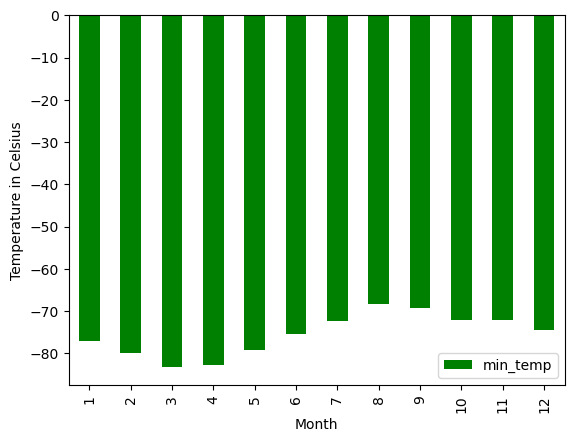

The coldest month is March
The warmest month is August


<Figure size 640x480 with 0 Axes>

In [62]:
# Plot the average temperature by month
avg_min_temp.plot(kind = "bar", xlabel = "Month", ylabel = "Temperature in Celsius", color = "green" )
plt.show()
plt.savefig('AvgTempbyMonth.png')
print('The coldest month is March')
print('The warmest month is August')

In [47]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby(["month"]).mean()["pressure"]
avg_pressure = pd.DataFrame(data=avg_pressure)
avg_pressure

C:\Users\Home\AppData\Local\Temp\ipykernel_20536\1394679937.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_pressure = df.groupby(["month"]).mean()["pressure"]


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


The lowest atmostpheric pressure is June, while the highest atmospheric is September


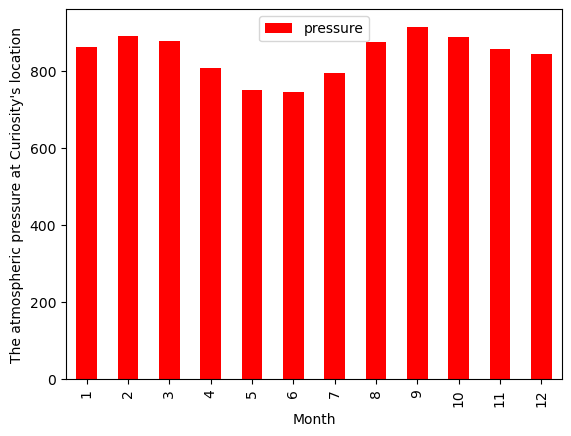

In [61]:
# Plot the average pressure by month
avg_pressure.plot(kind = "bar", xlabel = "Month", ylabel = "The atmospheric pressure at Curiosity's location", color = "red" )
plt.savefig('MarsAvgAtmosphericPressurebyMonth.png')
print('The lowest atmostpheric pressure is June, while the highest atmospheric is September')

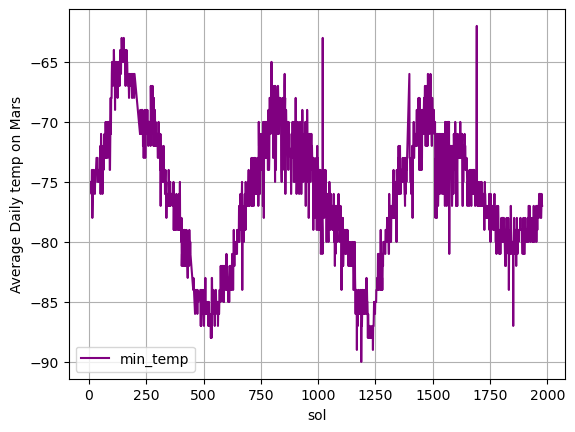

In [60]:
# 5. How many terrestrial (earth) days are there in a Martian year?
sol = df.sort_values('sol')
sol.plot(x='sol', y='min_temp', color = 'purple')
plt.xlabel('sol')
plt.ylabel('Average Daily temp on Mars')
plt.grid('grey')
plt.savefig("marsmin_dailytemp.png")
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [63]:
# Write the data to a CSV
df.to_csv('marsweather.csv', index=False)

In [64]:
browser.quit()